In [ ]:

import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets

In [9]:
data_transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=data_transform)
test_dataset = datasets.MNIST(root='data', train=False, download=True, transform=data_transform)

In [10]:
from torch.utils.data import DataLoader, Dataset
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
# Get a batch of images from the training data loader
data_iter = iter(train_loader)
pictures, true_values = next(data_iter)

In [14]:

from matplotlib import pyplot as plt
# Function to visualize images
def show_images_with_labels(images, labels):
    fig, axes = plt.subplots(len(images)//5, 5, figsize=(10, 2))
    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img.squeeze(), cmap='gray')
        ax.set_title(f'Value: {label}')
        ax.axis('off')
    plt.show()
    
def show_images_only(images):
    fig, axes = plt.subplots(len(images)//5, 5, figsize=(10, 2))
    for img, ax in zip(images, axes):
        ax.imshow(img.squeeze(), cmap='gray')
        # ax.set_title(f'Value: {label}')
        ax.axis('off')
    plt.show()


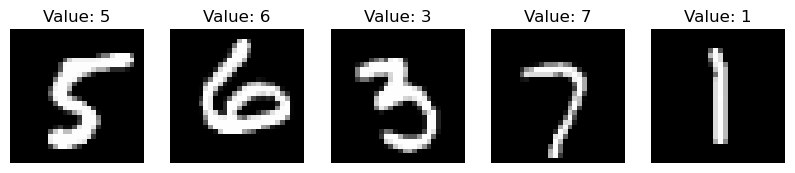

In [17]:
# show_images_only(pictures[10:15])
show_images_with_labels(pictures[10:15], true_values[10:15])

In [29]:
import random
for i in range(0,5):
    randint = random.randrange(0,10,1)
    print(randint)
    if randint >= 5:
        print("True")

4
5
True
3
6
True
5
True


In [30]:
for i, x in train_loader:
    print(i.shape)
    break

torch.Size([32, 1, 28, 28])


In [46]:
import random
# I want to load images from the dataset, visualise them, generate the mixed images, and visualise those. 
composite_images = []
composite_labels = []

for batch_images, batch_labels in train_loader:
    #take four and combine them into a group
    # at random, drop one of them
    for i in range(0,len(batch_images)-3, 4):
        grid_images = []
        grid_labels = []
        
        for k in range(0,4):
            randint = random.randrange(0,10,1)
            if randint >= 7: #70-30 chance of dropping out
                image = torch.zeros(size=(1, 56, 56))
                label = " "
            else:
                # print(f"index i, {i} and index k, {k}")
                image = torch.nn.functional.interpolate(batch_images[i + k].unsqueeze(0), size=(56, 56))[0]
                label = batch_labels[i + k].item()
            
            grid_images.append(image)
            grid_labels.append(label)
            
        top = torch.cat((grid_images[0], grid_images[1]), dim=2)  # horizontal concat
        bottom = torch.cat((grid_images[2], grid_images[3]), dim=2)
        full_image = torch.cat((top, bottom), dim=1)  # vertical concat
        
        composite_images.append(full_image)
        composite_labels.append(grid_labels)

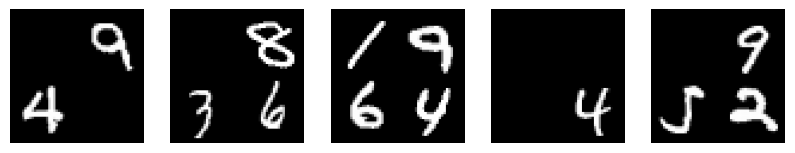

15000

In [47]:
show_images_only(composite_images[20:25])
len(composite_images)